In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

#%matplotlib inline  
# Importing socket library 
import socket 

# Function to display hostname and 
# IP address 
def get_Host_name_IP(): 
    try: 
        host_name = socket.gethostname() 
        host_ip = socket.gethostbyname(host_name) 
        print("Hostname : ",host_name) 
        print("IP : ",host_ip) 
            
    except: 
        print("Unable to get Hostname and IP") 
        host_ip = ''
        
    return host_ip

h_ip = get_Host_name_IP()
url = 'http://'+ h_ip +':5000'

('Hostname : ', 'McFly')
('IP : ', '127.0.0.1')


In [2]:
## change question and answers 

data = {}
questions = ['A','B']
data['questions'] = questions
data['filename'] = 'data//pollQ2.csv'

response = requests.post(url + '/questions', json=data)
json.loads(response.content)

{u'message': u'Successfully loaded questions'}

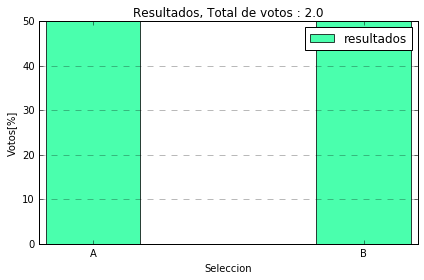

In [3]:
## read data
%matplotlib inline

response0 = requests.post(url + '/iplot')
r0 = json.loads(response0.content)
x0 = [str(r1) for r1 in r0['fields']]
y0 = r0['values']
data0 = np.array([x0,y0]).T
data0 = data0[data0[:,0].argsort()]

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.75

xs = np.arange(len(data0[:,0]))
ys = 100*np.array(data0[:,1].astype(float))/np.sum(data0[:,1].astype(float))

rects1 = plt.bar(xs, ys, bar_width, alpha=opacity, align='center', color='#0DFF92',label='resultados')
plt.xlabel('Seleccion')
plt.ylabel('Votos[%]')
plt.title('Resultados, Total de votos : ' + str(np.sum(data0[:,1].astype(float))))
a1 = ax.yaxis.grid(True, linestyle='--', which='major', color='black', alpha=.55)
plt.xticks(xs, data0[:,0])
plt.legend()
plt.tight_layout()
#plt.show()